In [1]:
import pandas as pd    
import matplotlib.pyplot as plt    
import seaborn as sns    

In [ ]:
# Inspect the sheet names in the Excel file
excel_file = pd.ExcelFile('Aula4dados.xlsx')
print(excel_file.sheet_names)

# Use the correct sheet name from the list above
df = pd.read_excel('Aula4dados.xlsx', sheet_name=excel_file.sheet_names[0])  # Replace index 0 with the correct sheet index or name
df.head()

['dados']


,ID_respondente,Idade,Sexo,Cidade,Trabalha,Fin_knowledge,TP_hedonist,TP_fatalist,TP_future,Fut_Fin_WB
0,1,27,Feminino,Sao Paulo,Sim,8.9,3.00,3.4,5.8,5.0
1,2,29,Feminino,Belo Horizonte,Sim,6.8,3.25,4.0,5.3,3.8
2,3,43,Feminino,Rio de Janeiro,Sim,4.6,2.75,2.0,5.9,4.0
3,4,29,Feminino,Salvador,Nao,4.7,1.00,2.0,2.6,2.6
4,5,25,Masculino,Belo Horizonte,Nao,3.9,3.00,2.6,3.1,1.8


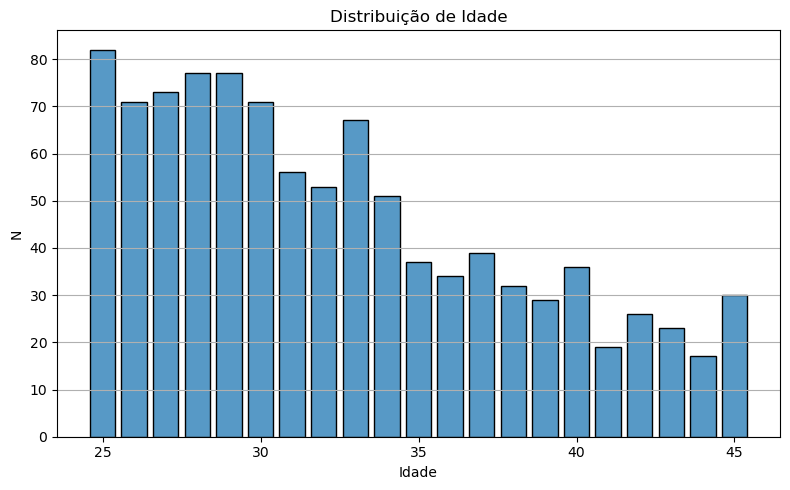

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Idade',
    discrete=True,
    shrink=0.8
)

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('N')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

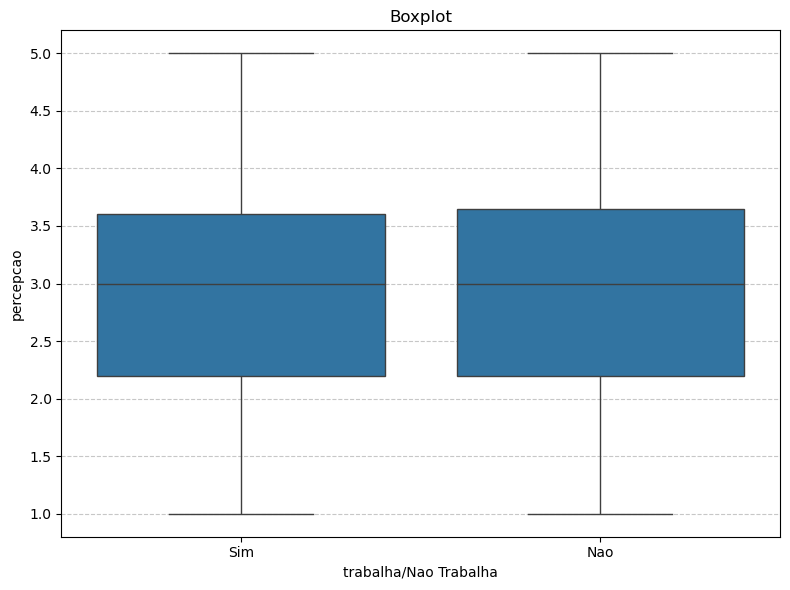

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Trabalha', y='Fut_Fin_WB ')  # Ensure the column name matches exactly
plt.title('Boxplot')
plt.xlabel('trabalha/Nao Trabalha')
plt.ylabel('percepcao')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
salario_medio_por_grupo.plot(kind='bar', figsize=(10, 6))
plt.title('Salário Médio por Faixa de Tempo de Empresa e Sexo')
plt.xlabel('Faixa de Tempo de Empresa')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Gabi\AppData\Local\Temp\ipykernel_15100\544317451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cidade', order=df['cidade'].value_counts().index, palette='Blues')


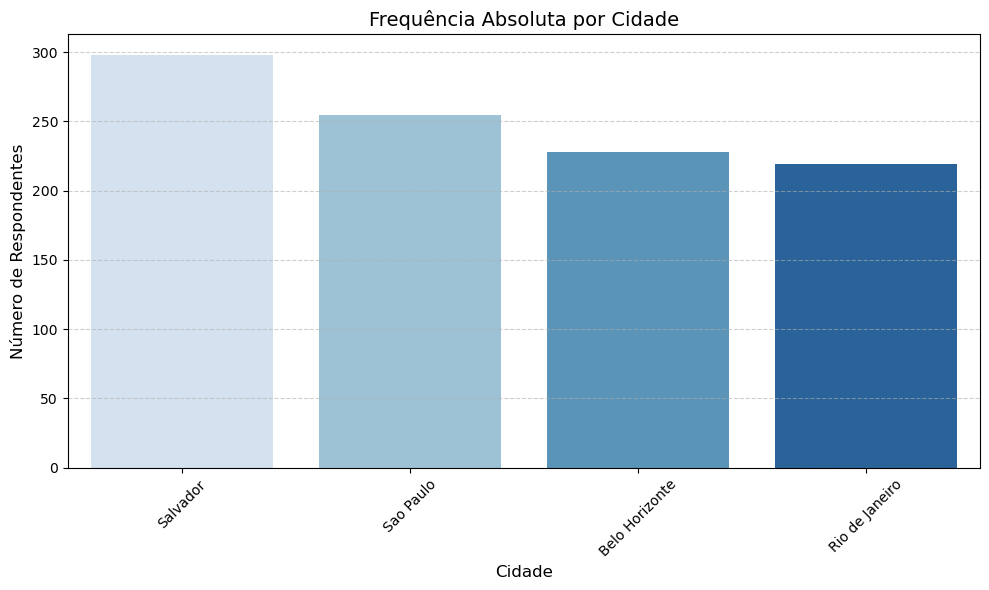

In [11]:
# Padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower()
df['cidade'] = df['cidade'].str.strip()

# Criar gráfico com seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cidade', order=df['cidade'].value_counts().index, palette='Blues')

# Ajustes do gráfico
plt.title('Frequência Absoluta por Cidade', fontsize=14)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

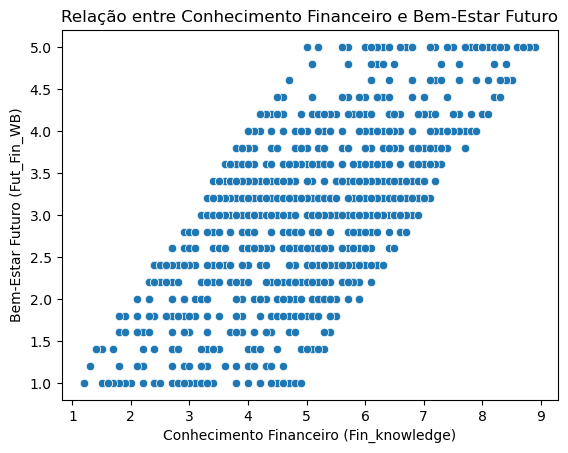

Correlação de Pearson: 0.642
Valor-p: 0.0000


In [15]:
# d.	Você acha que há evidência de que o conhecimento financeiro objetivo (variável ‘Fin_knowledge’) está relacionado com a autopercepção de bem-estar financeiro futuro (variável ‘Fut_Fin_WB’)? 
sns.scatterplot(x="fin_knowledge", y="fut_fin_wb", data=df)
plt.title("Relação entre Conhecimento Financeiro e Bem-Estar Futuro")
plt.xlabel("Conhecimento Financeiro (Fin_knowledge)")
plt.ylabel("Bem-Estar Futuro (Fut_Fin_WB)")
plt.show()

from scipy.stats import pearsonr

# Calcular correlação de Pearson e p-valor
corr, p_valor = pearsonr(df['fin_knowledge'], df['fut_fin_wb'])

print(f"Correlação de Pearson: {corr:.3f}")
print(f"Valor-p: {p_valor:.4f}")

>>> São Paulo
Média: 32.27
Mediana: 31.0
Moda: [27 28]
Desvio Padrão: 5.59
Variância: 31.21
Amplitude: 20

>>> Rio de Janeiro
Média: 32.97
Mediana: 32.0
Moda: [29]
Desvio Padrão: 5.70
Variância: 32.47
Amplitude: 20


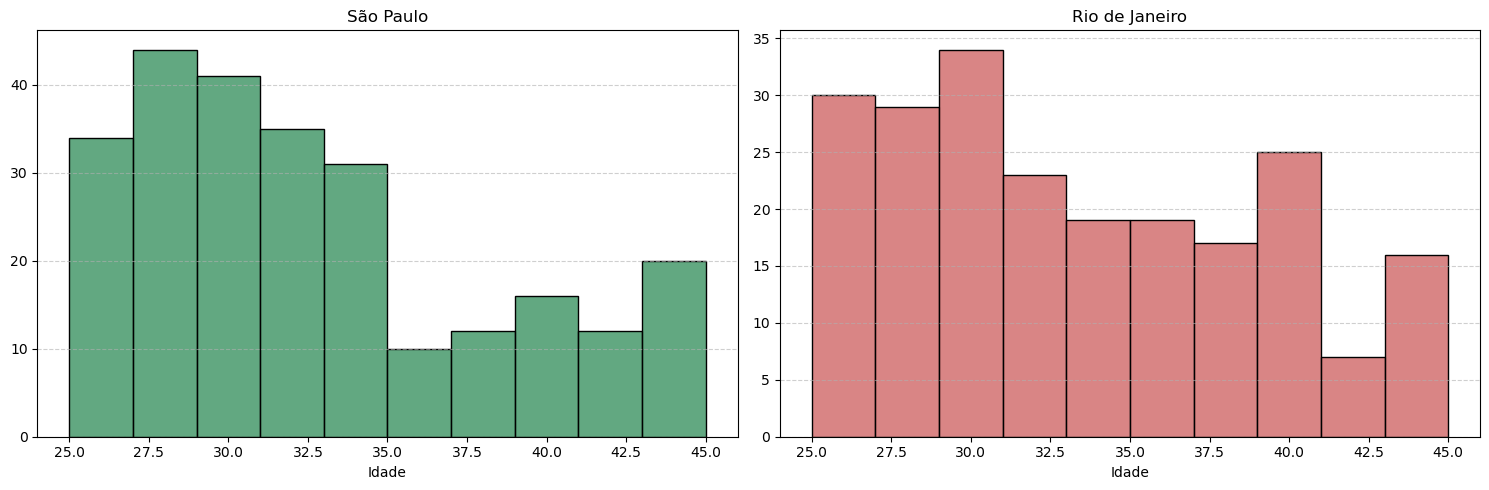

In [34]:
# Filtrar dados para São Paulo e Rio de Janeiro
df_sp = df[df['cidade'] == 'Sao Paulo']
df_rj = df[df['cidade'] == 'Rio de Janeiro']

# Estatísticas para São Paulo
media_sp = df_sp['idade'].mean()
mediana_sp = df_sp['idade'].median()
moda_sp = df_sp['idade'].mode().values  # retorna uma lista
desvio_sp = df_sp['idade'].std()
variancia_sp = df_sp['idade'].var()
amplitude_sp = df_sp['idade'].max() - df_sp['idade'].min()

# Estatísticas para Rio de Janeiro
media_rj = df_rj['idade'].mean()
mediana_rj = df_rj['idade'].median()
moda_rj = df_rj['idade'].mode().values  # pode haver mais de uma moda
desvio_rj = df_rj['idade'].std()
variancia_rj = df_rj['idade'].var()
amplitude_rj = df_rj['idade'].max() - df_rj['idade'].min()

# Exibir resultados
print(">>> São Paulo")
print(f"Média: {media_sp:.2f}")
print(f"Mediana: {mediana_sp}")
print(f"Moda: {moda_sp}")
print(f"Desvio Padrão: {desvio_sp:.2f}")
print(f"Variância: {variancia_sp:.2f}")
print(f"Amplitude: {amplitude_sp}")

print("\n>>> Rio de Janeiro")
print(f"Média: {media_rj:.2f}")
print(f"Mediana: {mediana_rj}")
print(f"Moda: {moda_rj}")
print(f"Desvio Padrão: {desvio_rj:.2f}")
print(f"Variância: {variancia_rj:.2f}")
print(f"Amplitude: {amplitude_rj}")

# Histograma geral
plt.figure(figsize=(15, 5))


# Histograma São Paulo
plt.subplot(1, 2, 1)
sns.histplot(df_sp['idade'], bins=10, kde=False, color='seagreen', edgecolor='black')
plt.title('São Paulo')
plt.xlabel('Idade')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histograma Rio de Janeiro
plt.subplot(1, 2, 2)
sns.histplot(df_rj['idade'], bins=10, kde=False, color='indianred', edgecolor='black')
plt.title('Rio de Janeiro')
plt.xlabel('Idade')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()